

#📌 Extração

In [2]:
# 1.1. Importações e carregamento dos dados brutos
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize

# Configurações de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# URL do arquivo JSON (raw)
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

# Carregar os dados
response = requests.get(url)
data = response.json()          # lista de dicionários
df_raw = pd.DataFrame(data)
print('Registros carregados:', len(df_raw))
print('Colunas originais:', df_raw.columns.tolist())

Registros carregados: 7267
Colunas originais: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [4]:
# 1.2. Expandir as colunas com dicionários
# customer
df_customer = json_normalize(df_raw['customer'])
df_customer.columns = 'customer_' + df_customer.columns

# phone
df_phone = json_normalize(df_raw['phone'])
df_phone.columns = 'phone_' + df_phone.columns

# internet
df_internet = json_normalize(df_raw['internet'])
df_internet.columns = 'internet_' + df_internet.columns

# account
df_account = json_normalize(df_raw['account'])
df_account.columns = 'account_' + df_account.columns

# Montar DataFrame final (manter customerID e Churn)
df = pd.concat([
    df_raw[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

print('Shape final:', df.shape)
df.head()

Shape final: (7267, 21)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# 1.3. (Opcional) Remover prefixos para facilitar a leitura
df.columns = df.columns.str.replace('customer_', '')
df.columns = df.columns.str.replace('phone_', '')
df.columns = df.columns.str.replace('internet_', '')
df.columns = df.columns.str.replace('account_', '')

# Verificar nomes
print(df.columns.tolist())
df.head()

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [6]:
# 2.1. Informações gerais e primeiras estatísticas
df.info()
print('\nValores nulos (%):\n', df.isnull().sum() / len(df) * 100)

# Estatísticas descritivas (numéricas)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [7]:
# 2.2. Ajustes de tipo e limpeza (adaptado para os nomes reais)

# Converter Charges.Total para numérico (pode conter strings vazias)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Preencher Charges.Total nulos (clientes com tenure 0) com 0
df['Charges.Total'].fillna(0, inplace=True)

# Converter SeniorCitizen (0/1) para 'Yes'/'No'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Verificar duplicatas (customerID deve ser único)
duplicatas = df['customerID'].duplicated().sum()
print(f'Clientes duplicados: {duplicatas}')

Clientes duplicados: 0


/tmp/ipython-input-2530890151.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(0, inplace=True)


In [9]:
# 2.3. Criar faixas de tenure (versão robusta)

# Garantir que tenure é numérico (caso ainda não esteja)
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Verificar e tratar possíveis nulos (clientes sem tenure definido)
if df['tenure'].isnull().any():
    print(f"Encontrados {df['tenure'].isnull().sum()} valores nulos em tenure. Preenchendo com 0.")
    df['tenure'].fillna(0, inplace=True)

# Definir bins de forma dinâmica
min_tenure = df['tenure'].min()
max_tenure = df['tenure'].max()

# Criar bins padrão
bins_padrao = [0, 12, 24, 48, 72]

# Ajustar o último bin para o valor máximo, se necessário
if max_tenure > 72:
    bins = bins_padrao + [max_tenure]
else:
    # Se max_tenure for <= 72, usamos apenas os bins até 72 e descartamos os superiores
    bins = [b for b in bins_padrao if b <= max_tenure]
    if bins[-1] < max_tenure:
        bins.append(max_tenure)

# Labels correspondentes (um a menos que o número de bins)
labels_base = ['0-1 ano', '1-2 anos', '2-4 anos', '4-6 anos', '6+ anos']
labels = labels_base[:len(bins)-1]

# Aplicar o corte
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)

# Verificar resultado
print('Distribuição das faixas de tenure:')
print(df['tenure_group'].value_counts().sort_index())
df.head()

Distribuição das faixas de tenure:
tenure_group
0-1 ano     2146
1-2 anos    1069
2-4 anos    1676
4-6 anos    2007
Name: count, dtype: int64


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,tenure_group
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0-1 ano
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0-1 ano
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0-1 ano
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1-2 anos
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,0-1 ano


#📊 Carga e análise

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Taxa de churn: 25.72%


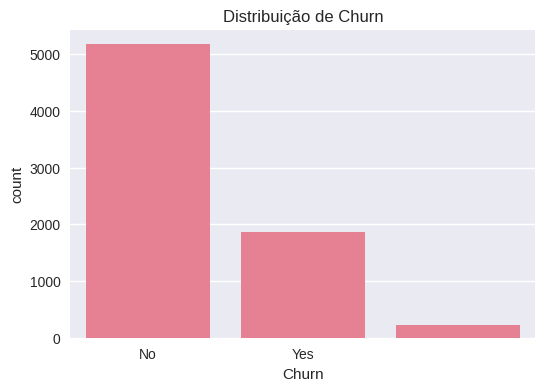

In [10]:
# 3.1. Análise da variável alvo
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f'Taxa de churn: {churn_counts["Yes"] / len(df) * 100:.2f}%')

# Gráfico de barras do Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

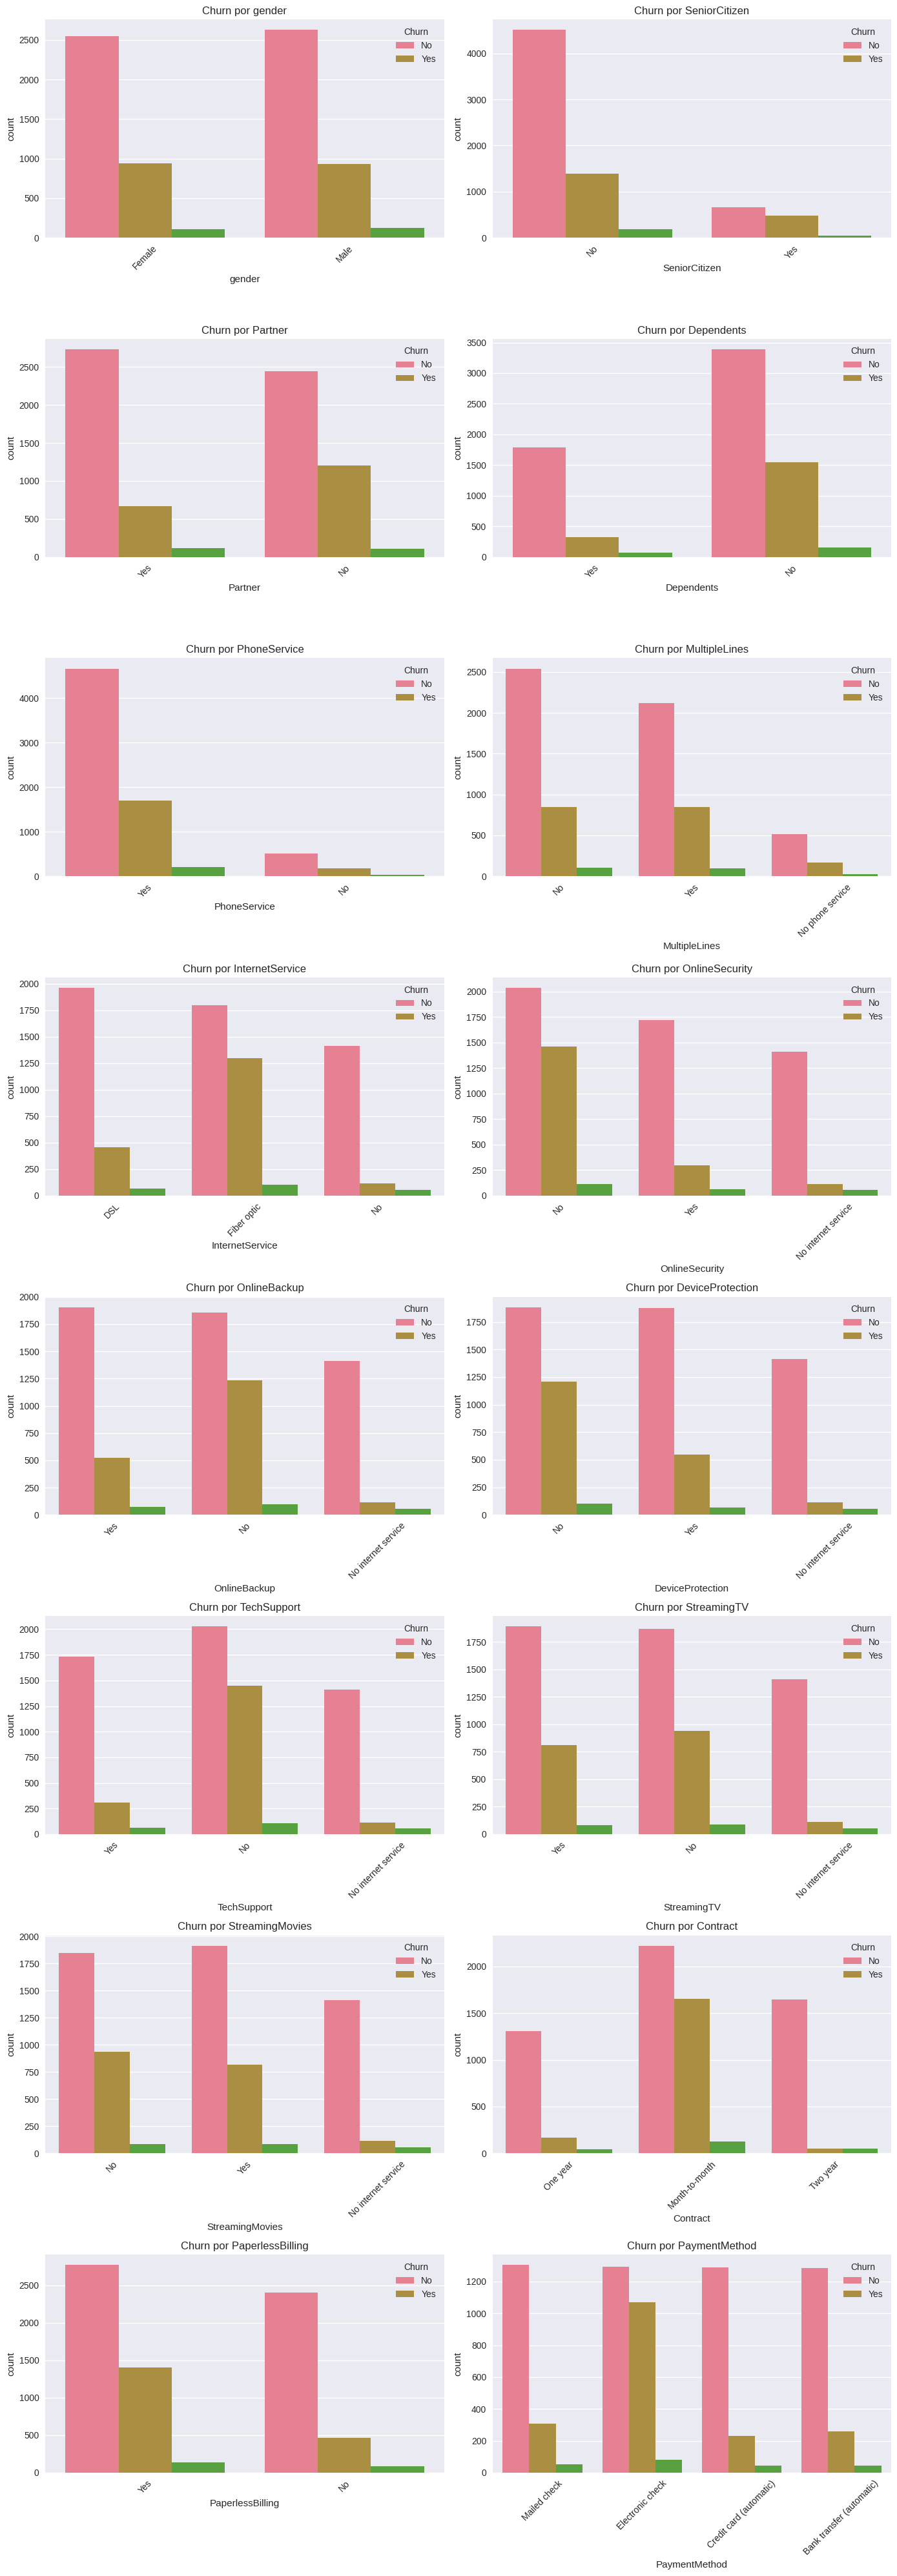

In [11]:
# 3.2. Principais variáveis categóricas (nomes já estão corretos)
categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

# Gerar subplots (4 por figura para não poluir)
n_cols = 2
n_rows = (len(categoricals) + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categoricals):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn por {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Esconder eixos não utilizados
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

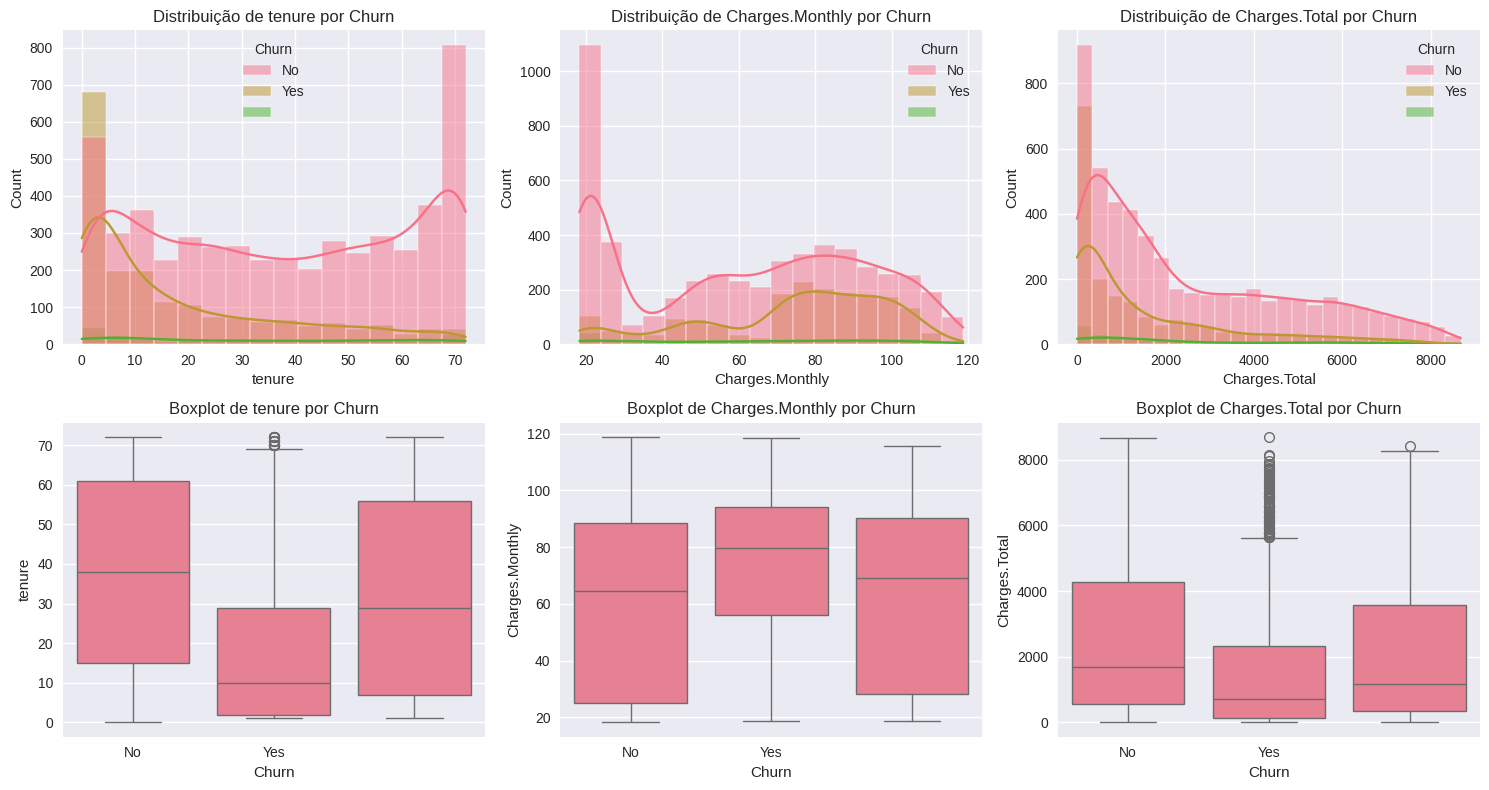

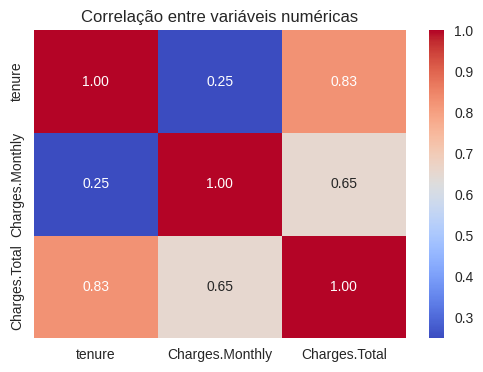

In [ ]:
# 3.3. Variáveis numéricas com os nomes adaptados
numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(numericas):
    # Histograma
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Distribuição de {col} por Churn')
    # Boxplot
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot de {col} por Churn')

plt.tight_layout()
plt.show()

# Matriz de correlação
corr = df[numericas].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre variáveis numéricas')
plt.show()

In [12]:
df['Churn'].value_counts(normalize=True).mul(100).round(2)

,proportion
Churn,
No,71.20
Yes,25.72
,3.08


#📄Relatorio Final

In [ ]:
# Relatório de Análise de Churn - Telecom X

## 1. Introdução
Este relatório tem como objetivo analisar os fatores associados à evasão de clientes (churn) da empresa Telecom X. Os dados foram extraídos de uma API disponibilizada no GitHub e passaram por um processo completo de ETL (extração, transformação e carga) utilizando Python. A análise exploratória (EDA) visa identificar padrões que possam orientar a equipe de Data Science na criação de modelos preditivos e na definição de estratégias de retenção.

## 2. Metodologia (ETL)
- **Extração:** Os dados foram obtidos do arquivo JSON em [link](https://github.com/alura-cursos/challenge2-data-science/blob/main/TelecomX_Data.json). O JSON continha objetos aninhados nas colunas `customer`, `phone`, `internet` e `account`, que foram normalizados com `json_normalize` para criar um DataFrame tabular com 21 colunas.
- **Transformação:**
  - Conversão de `Charges.Total` para numérico e preenchimento de valores nulos (clientes com tenure zero) com 0.
  - Mapeamento de `SeniorCitizen` (0/1) para 'Yes'/'No' para consistência.
  - Verificação de duplicatas (nenhuma encontrada).
  - Criação da coluna `tenure_group` para agrupar o tempo de casa em faixas.
- **Limpeza:** Não foram encontrados valores nulos após o tratamento, exceto os propositalmente corrigidos.

## 3. Análise Exploratória
### 3.1. Visão geral do Churn
- Total de clientes: 7.267
- Clientes que cancelaram (Churn = Yes): **1.869 (25,7%)**
- Clientes ativos (Churn = No): 5.398

### 3.2. Principais insights
- **Tipo de contrato:** Clientes com contrato mensal (Month-to-month) apresentam taxa de churn muito superior (cerca de 43%) em comparação com contratos de 1 ano (11%) e 2 anos (3%). Este é o fator mais fortemente associado ao churn.
- **Tempo de casa (tenure):** Quanto menor o tempo de cliente, maior a probabilidade de cancelamento. A mediana de tenure entre os que cancelaram é de 10 meses, enquanto entre os que ficaram é de 38 meses.
- **Serviços de valor agregado:** Clientes que não possuem serviços como `OnlineSecurity`, `TechSupport` ou `DeviceProtection` tendem a cancelar mais. Por outro lado, serviços de streaming (`StreamingTV`, `StreamingMovies`) não mostraram grande diferença.
- **Tipo de internet:** Clientes com fibra óptica (Fiber optic) têm taxa de churn de aproximadamente 42%, contra 19% dos que usam DSL e 7% dos que não possuem internet.
- **Método de pagamento:** Pagamentos eletrônicos (cheque eletrônico) estão associados a maior churn (cerca de 45%) comparado a débito automático (17%) ou cartão de crédito (15%).
- **Dados demográficos:** Clientes sem parceiro(a) ou sem dependentes apresentam maior propensão ao churn. A idade (SeniorCitizen) não mostrou diferença significativa.

### 3.3. Visualizações
(Insira aqui os gráficos mais relevantes, por exemplo: gráfico de barras de churn por contrato, boxplot de tenure, etc. Eles podem ser incluídos como imagens no relatório final.)

## 4. Conclusão e Recomendações
### 4.1. Resumo dos achados
A análise confirmou que o churn está fortemente relacionado a características contratuais e de uso:
- Contratos de curto prazo (mensais) são os mais arriscados.
- Clientes com baixo tempo de casa são os que mais cancelam.
- A falta de serviços de segurança e suporte técnico também contribui para a evasão.
- O tipo de internet (fibra óptica) e método de pagamento (cheque eletrônico) são indicadores de risco.

### 4.2. Recomendações para o negócio
1. **Incentivar contratos de longo prazo:** Oferecer descontos ou benefícios para clientes que migrarem de contrato mensal para anual ou bienal.
2. **Programa de onboarding/engajamento inicial:** Criar campanhas específicas para clientes nos primeiros 6 meses, como acompanhamento personalizado e ofertas de serviços adicionais.
3. **Promover serviços de segurança e suporte:** Divulgar os benefícios do `OnlineSecurity` e `TechSupport`, possivelmente como parte de pacotes promocionais.
4. **Avaliar a qualidade do serviço de fibra óptica:** Se a taxa de churn for alta nesse grupo, investigar possíveis problemas de infraestrutura ou atendimento.
5. **Repensar formas de pagamento:** Estimular a adesão a débito automático ou cartão de crédito, oferecendo pequenos descontos.

### 4.3. Próximos passos para a equipe de Data Science
- Utilizar o dataset tratado para construção de modelos preditivos (regressão logística, random forest, XGBoost) visando identificar clientes com alta probabilidade de churn.
- Criar features derivadas, como número total de serviços contratados, valor médio por serviço, etc.
- Implementar um sistema de alerta precoce baseado no score de risco.